# Регрессия на доходность первого дня

### Импорты

In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

import shap

from scipy.stats import spearmanr, pearsonr, kendalltau

import warnings
warnings.filterwarnings("ignore")

### Датафрейм

In [28]:
path = '../../../data/final/pairs.csv'

data = pd.read_csv(path, index_col = 0)
data.head(3)

views  forwards  thumb_up_react_cnt  thumb_down_react_cnt  \
0  63078        63                 251                    19   
1  63078        63                 251                    19   
2  63078        63                 251                    19   

   mindblowing_react_cnt  heart_react_cnt  thinking_react_cnt  \
0                      0               27                  36   
1                      0               27                  36   
2                      0               27                  36   

   crying_react_cnt  fire_react_cnt  clap_react_cnt  ...  \
0                 0               2               0  ...   
1                 0               2               0  ...   
2                 0               2               0  ...   

   free_bird_react_cnt_x_positive_div_by_days  \
0                                        -0.0   
1                                        -0.0   
2                                        -0.0   

   snowman_react_cnt_x_positive_div_by_days  \
0                                      -0.0   
1                                      -0.0   
2                                      -0.0   

   banana_react_cnt_x_positive_div_by_days  \
0                                     -0.0   
1                                     -0.0   
2                                     -0.0   

   poop_react_cnt_x_positive_div_by_days  \
0                                   -0.0   
1                                   -0.0   
2                                   -0.0   

   rofl_smile_react_cnt_x_positive_div_by_days  \
0                                         -0.0   
1                                         -0.0   
2                                         -0.0   

   clown_smile_react_cnt_x_positive_div_by_days  \
0                                          -0.0   
1                                          -0.0   
2                                          -0.0   

   devil_smile_react_cnt_x_positive_div_by_days  \
0                                          -0.0   
1                                          -0.0   
2                                          -0.0   

   hundred_react_cnt_x_positive_div_by_days  \
0                                      -0.0   
1                                      -0.0   
2                                      -0.0   

   head_arm_smile_react_cnt_x_positive_div_by_days  \
0                                             -0.0   
1                                             -0.0   
2                                             -0.0   

   eyes_react_cnt_x_positive_div_by_days  
0                                   -0.0  
1                                   -0.0  
2                                   -0.0  

[3 rows x 147 columns]

In [29]:
cols = ['views',
 'forwards',
 'thumb_up_react_cnt',
 'thumb_down_react_cnt',
 'mindblowing_react_cnt',
 'heart_react_cnt',
 'thinking_react_cnt',
 'crying_react_cnt',
 'fire_react_cnt',
 'clap_react_cnt',
 'whale_react_cnt',
 'champaign_react_cnt',
 'heart_fire_react_cnt',
 'okay_react_cnt',
 'smile_stars_react_cnt',
 'smiling_react_cnt',
 'cheers_react_cnt',
 'lovely_smile_react_cnt',
 'drunk_smile_react_cnt',
 'angry_smile_react_cnt',
 'shicked_smile_react_cnt',
 'moos_smile_react_cnt',
 'hotdog_react_cnt',
 'free_bird_react_cnt',
 'snowman_react_cnt',
 'banana_react_cnt',
 'poop_react_cnt',
 'rofl_smile_react_cnt',
 'clown_smile_react_cnt',
 'devil_smile_react_cnt',
 'hundred_react_cnt',
 'head_arm_smile_react_cnt',
 'eyes_react_cnt',
 'days_before_ipo',
 'text_len',
 'price',
 'delta_price',
 'delta_perc',
 'open',
 'delta_open',
 'delta_perc_on_ipo_date',
 'positive_score',
 'views_x_positive',
 'forwards_x_positive',
 'thumb_up_react_cnt_x_positive',
 'thumb_down_react_cnt_x_positive',
 'mindblowing_react_cnt_x_positive',
 'heart_react_cnt_x_positive',
 'thinking_react_cnt_x_positive',
 'crying_react_cnt_x_positive',
 'fire_react_cnt_x_positive',
 'clap_react_cnt_x_positive',
 'whale_react_cnt_x_positive',
 'champaign_react_cnt_x_positive',
 'heart_fire_react_cnt_x_positive',
 'okay_react_cnt_x_positive',
 'smile_stars_react_cnt_x_positive',
 'smiling_react_cnt_x_positive',
 'cheers_react_cnt_x_positive',
 'lovely_smile_react_cnt_x_positive',
 'drunk_smile_react_cnt_x_positive',
 'angry_smile_react_cnt_x_positive',
 'shicked_smile_react_cnt_x_positive',
 'moos_smile_react_cnt_x_positive',
 'hotdog_react_cnt_x_positive',
 'free_bird_react_cnt_x_positive',
 'snowman_react_cnt_x_positive',
 'banana_react_cnt_x_positive',
 'poop_react_cnt_x_positive',
 'rofl_smile_react_cnt_x_positive',
 'clown_smile_react_cnt_x_positive',
 'devil_smile_react_cnt_x_positive',
 'hundred_react_cnt_x_positive',
 'head_arm_smile_react_cnt_x_positive',
 'eyes_react_cnt_x_positive',
 'views_div_by_days',
 'forwards_div_by_days',
 'thumb_up_react_cnt_div_by_days',
 'thumb_down_react_cnt_div_by_days',
 'mindblowing_react_cnt_div_by_days',
 'heart_react_cnt_div_by_days',
 'thinking_react_cnt_div_by_days',
 'crying_react_cnt_div_by_days',
 'fire_react_cnt_div_by_days',
 'clap_react_cnt_div_by_days',
 'whale_react_cnt_div_by_days',
 'champaign_react_cnt_div_by_days',
 'heart_fire_react_cnt_div_by_days',
 'okay_react_cnt_div_by_days',
 'smile_stars_react_cnt_div_by_days',
 'smiling_react_cnt_div_by_days',
 'cheers_react_cnt_div_by_days',
 'lovely_smile_react_cnt_div_by_days',
 'drunk_smile_react_cnt_div_by_days',
 'angry_smile_react_cnt_div_by_days',
 'shicked_smile_react_cnt_div_by_days',
 'moos_smile_react_cnt_div_by_days',
 'hotdog_react_cnt_div_by_days',
 'free_bird_react_cnt_div_by_days',
 'snowman_react_cnt_div_by_days',
 'banana_react_cnt_div_by_days',
 'poop_react_cnt_div_by_days',
 'rofl_smile_react_cnt_div_by_days',
 'clown_smile_react_cnt_div_by_days',
 'devil_smile_react_cnt_div_by_days',
 'hundred_react_cnt_div_by_days',
 'head_arm_smile_react_cnt_div_by_days',
 'eyes_react_cnt_div_by_days',
 'text_len_div_by_days',
 'positive_score_div_by_days',
 'views_x_positive_div_by_days',
 'forwards_x_positive_div_by_days',
 'thumb_up_react_cnt_x_positive_div_by_days',
 'thumb_down_react_cnt_x_positive_div_by_days',
 'mindblowing_react_cnt_x_positive_div_by_days',
 'heart_react_cnt_x_positive_div_by_days',
 'thinking_react_cnt_x_positive_div_by_days',
 'crying_react_cnt_x_positive_div_by_days',
 'fire_react_cnt_x_positive_div_by_days',
 'clap_react_cnt_x_positive_div_by_days',
 'whale_react_cnt_x_positive_div_by_days',
 'champaign_react_cnt_x_positive_div_by_days',
 'heart_fire_react_cnt_x_positive_div_by_days',
 'okay_react_cnt_x_positive_div_by_days',
 'smile_stars_react_cnt_x_positive_div_by_days',
 'smiling_react_cnt_x_positive_div_by_days',
 'cheers_react_cnt_x_positive_div_by_days',
 'lovely_smile_react_cnt_x_positive_div_by_days',
 'drunk_smile_react_cnt_x_positive_div_by_days',
 'angry_smile_react_cnt_x_positive_div_by_days',
 'shicked_smile_react_cnt_x_positive_div_by_days',
 'moos_smile_react_cnt_x_positive_div_by_days',
 'hotdog_react_cnt_x_positive_div_by_days',
 'free_bird_react_cnt_x_positive_div_by_days',
 'snowman_react_cnt_x_positive_div_by_days',
 'banana_react_cnt_x_positive_div_by_days',
 'poop_react_cnt_x_positive_div_by_days',
 'rofl_smile_react_cnt_x_positive_div_by_days',
 'clown_smile_react_cnt_x_positive_div_by_days',
 'devil_smile_react_cnt_x_positive_div_by_days',
 'hundred_react_cnt_x_positive_div_by_days',
 'head_arm_smile_react_cnt_x_positive_div_by_days',
 'eyes_react_cnt_x_positive_div_by_days']

target = '1d_price'

In [30]:
data = data[data[target].notnull()]

X = data[cols]
X['crying_react_cnt'] = X['crying_react_cnt'].clip(0, 1000)
y = (data[target] > 0).astype(int)

### Results collection

In [31]:
results = pd.DataFrame(columns = ['Accuracy', 'roc_auc_score', 'f1_score'])

### Baseline model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [33]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_score_train = model.predict_proba(X_train)[:, 1]
y_pred_score_test = model.predict_proba(X_test)[:, 1]

In [34]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'baseline_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'baseline_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train    0.8175         0.6647    0.0638
baseline_test     0.8185         0.6530    0.0487

### Feature selection

1. Null drop
2. Nonsense drop
3. Correlation drop
4. roc auc drop
5. Manual linearization
6. Forward selection drop

In [35]:
import sys
sys.path.insert(1, '../../pipeline')

import pipeline as pl

In [36]:
cols = X_train.columns
print(f'{len(cols)} features before pipeline')

143 features before pipeline


### Null drop

In [37]:
cols = pl.null_drop(X, cutoff = 0.5)
print(f'{len(cols)} features remain')

143 features remain


### Nonsense drop

In [38]:
cols = pl.nonsense_drop(X[cols], 0.9)
print(f'{len(cols)} features remain')

47 features remain


In [13]:
model = LogisticRegression()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [14]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_nonsense_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train               0.8175         0.6647    0.0638
baseline_test                0.8185         0.6530    0.0487
after_nonsense_drop_train    0.8174         0.6650    0.0629
after_nonsense_drop_test     0.8185         0.6529    0.0475

### Soft correlation drop

In [15]:
cols = pl.corr_drop_classification(X[cols], y,  0.8)
print(f'{len(cols)} features remain')

open (0.56) was removed by price (0.56)
delta_perc (0.511) was removed by delta_price (0.511)
delta_perc (0.511) was removed by delta_perc_on_ipo_date (0.511)
crying_react_cnt_div_by_days (0.5) was removed by crying_react_cnt_x_positive_div_by_days (0.5)
smiling_react_cnt_x_positive_div_by_days (0.501) was removed by smiling_react_cnt_div_by_days (0.502)
42 features remain


In [16]:
model = LogisticRegression()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [17]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_soft_correlation_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_soft_correlation_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.8175         0.6647    0.0638
baseline_test                        0.8185         0.6530    0.0487
after_nonsense_drop_train            0.8174         0.6650    0.0629
after_nonsense_drop_test             0.8185         0.6529    0.0475
after_soft_correlation_drop_train    0.8179         0.6713    0.0708
after_soft_correlation_drop_test     0.8189         0.6603    0.0535

### roc_auc drop

In [18]:
cols_temp = []
cutoff = 0.525

for col in cols:
    auc = roc_auc_score(y_train, X_train[col])
    auc = max(auc, 1-auc)
    if auc > cutoff:
        cols_temp.append(col)
        
cols = cols_temp
print(f'{len(cols)} features remain')

12 features remain


In [19]:
model = LogisticRegression()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [20]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_auc_drop_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_auc_drop_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.8175         0.6647    0.0638
baseline_test                        0.8185         0.6530    0.0487
after_nonsense_drop_train            0.8174         0.6650    0.0629
after_nonsense_drop_test             0.8185         0.6529    0.0475
after_soft_correlation_drop_train    0.8179         0.6713    0.0708
after_soft_correlation_drop_test     0.8189         0.6603    0.0535
after_auc_drop_train                 0.8173         0.6622    0.0623
after_auc_drop_test                  0.8180         0.6518    0.0438

### Manual linearization

In [23]:
best_funcs = []
for col in cols:
    res = pl.linearization_binary(X_train, y_train, col, target, n_buckets = 100, cutoff = 0.05)
    print(f'best func for {col} is {res[0]} ({np.round(res[1], 4)})')
    best_funcs.append(res[0])

best func for views is <ufunc 'log'> (0.3637)
best func for forwards is <function <lambda> at 0x7fb49b9f0790> (0.308)
best func for thumb_up_react_cnt is <function <lambda> at 0x7fb49b9f0550> (0.4859)
best func for heart_react_cnt is <function <lambda> at 0x7fb49b9f0790> (0.2431)
best func for days_before_ipo is <function <lambda> at 0x7fb49b9f0550> (-1)
best func for open is <ufunc 'log'> (0.5374)
best func for views_div_by_days is <ufunc 'sqrt'> (0.7766)
best func for forwards_div_by_days is <ufunc 'sqrt'> (0.8402)
best func for thumb_up_react_cnt_div_by_days is <function <lambda> at 0x7fb49b9f0550> (-1)
best func for heart_react_cnt_div_by_days is <ufunc 'sqrt'> (0.9243)
best func for fire_react_cnt_div_by_days is <ufunc 'sqrt'> (0.8651)
best func for text_len_div_by_days is <function <lambda> at 0x7fb49b9f0790> (0.8902)


In [24]:
for i in range(len(cols)):
    X_train[cols[i]] = best_funcs[i](X_train[cols[i]])
    X_test[cols[i]] = best_funcs[i](X_test[cols[i]])

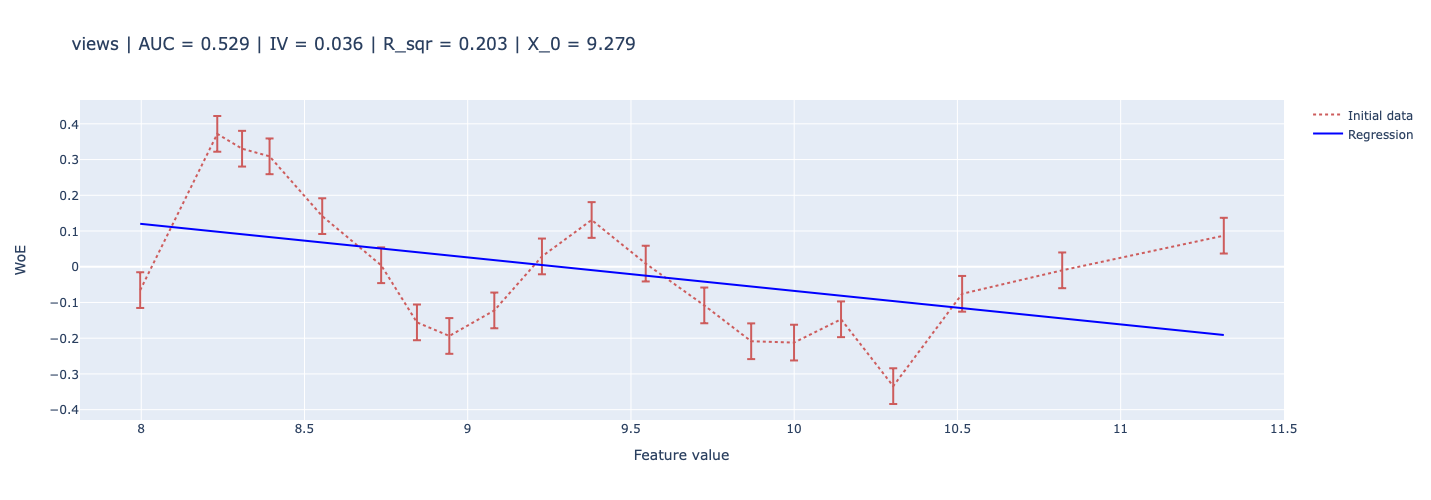

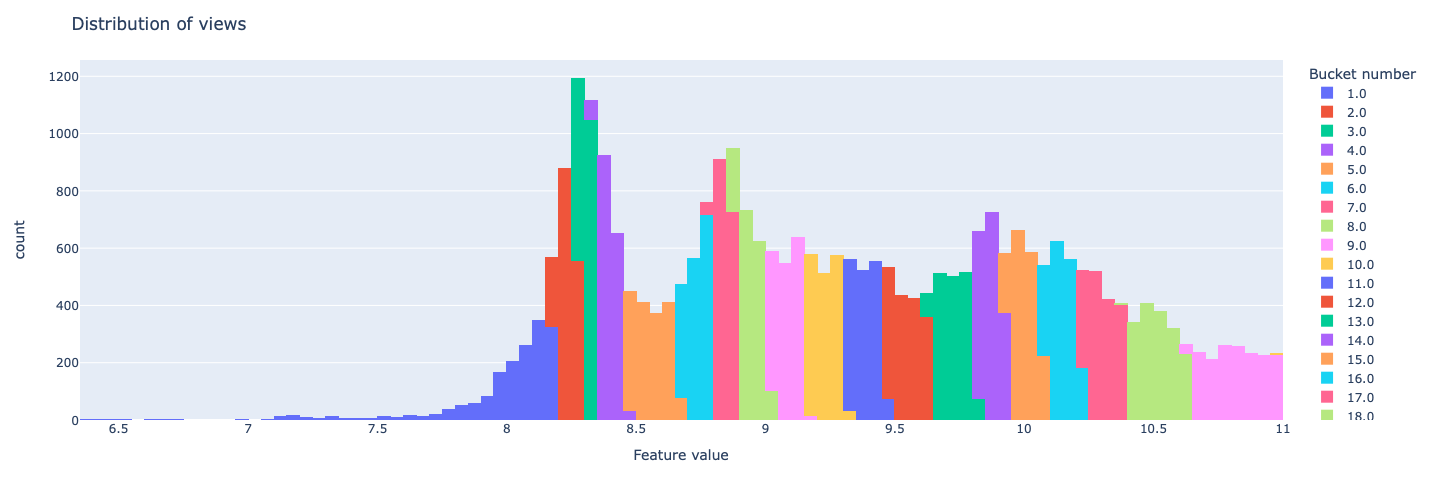

In [25]:
pl.woe_line(X_train['views'], y_train, n_buckets=20, feature_name='views', target_name=target, interactive = False)

In [23]:
model = LogisticRegression()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [24]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'after_linearization_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'after_linearization_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.8175         0.6647    0.0638
baseline_test                        0.8185         0.6530    0.0487
after_nonsense_drop_train            0.8174         0.6650    0.0629
after_nonsense_drop_test             0.8185         0.6529    0.0475
after_soft_correlation_drop_train    0.8179         0.6713    0.0708
after_soft_correlation_drop_test     0.8189         0.6603    0.0535
after_auc_drop_train                 0.8173         0.6622    0.0623
after_auc_drop_test                  0.8180         0.6518    0.0438
after_linearization_train            0.8294         0.6760    0.2007
after_linearization_test             0.8309         0.6737    0.1885

### Forward selection

In [25]:
train_df = X_train
train_df['target'] = y_train
model = LogisticRegression

In [26]:
cols = pl.forward_selection_classification(train_df, cols[:10], model, target='target', alpha_in=0.05)

В модель была добавлена переменная views_div_by_days, p-value: 0.0
В модель была добавлена переменная views, p-value: 0.0
В модель была добавлена переменная heart_react_cnt_div_by_days, p-value: 0.0
В модель была добавлена переменная days_before_ipo, p-value: 0.0
В модель была добавлена переменная open, p-value: 0.0


### Итоговые переменные

In [27]:
print(f'total params:{len(cols)}')
cols

total params:5


['views_div_by_days',
 'views',
 'heart_react_cnt_div_by_days',
 'days_before_ipo',
 'open']

### Model

In [28]:
model = LogisticRegression()

model.fit(X_train[cols], y_train)

y_pred_train = model.predict(X_train[cols])
y_pred_test = model.predict(X_test[cols])

y_pred_score_train = model.predict_proba(X_train[cols])[:, 1]
y_pred_score_test = model.predict_proba(X_test[cols])[:, 1]

In [29]:
# accuracy
acc_train = round(accuracy_score(y_train, y_pred_train), 4)
acc_test = round(accuracy_score(y_test, y_pred_test), 4)

# f1
f1_train = round(f1_score(y_train, y_pred_train), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)

# roc_auc
auc_train = round(roc_auc_score(y_train, y_pred_score_train), 4)
auc_test = round(roc_auc_score(y_test, y_pred_score_test), 4)

cur_res = {'Accuracy' : acc_train,
          'roc_auc_score' : auc_train,
          'f1_score' : f1_train}

results = results.append(pd.Series(cur_res,  name = 'model_train'))

cur_res = {'Accuracy' : acc_test,
          'roc_auc_score' : auc_test,
          'f1_score' : f1_test}

results = results.append(pd.Series(cur_res,  name = 'model_test'))
results

Accuracy  roc_auc_score  f1_score
baseline_train                       0.8175         0.6647    0.0638
baseline_test                        0.8185         0.6530    0.0487
after_nonsense_drop_train            0.8174         0.6650    0.0629
after_nonsense_drop_test             0.8185         0.6529    0.0475
after_soft_correlation_drop_train    0.8179         0.6713    0.0708
after_soft_correlation_drop_test     0.8189         0.6603    0.0535
after_auc_drop_train                 0.8173         0.6622    0.0623
after_auc_drop_test                  0.8180         0.6518    0.0438
after_linearization_train            0.8294         0.6760    0.2007
after_linearization_test             0.8309         0.6737    0.1885
model_train                          0.8295         0.6867    0.2010
model_test                           0.8324         0.6813    0.2027

In [30]:
results.to_csv('results/1d_regression.csv')

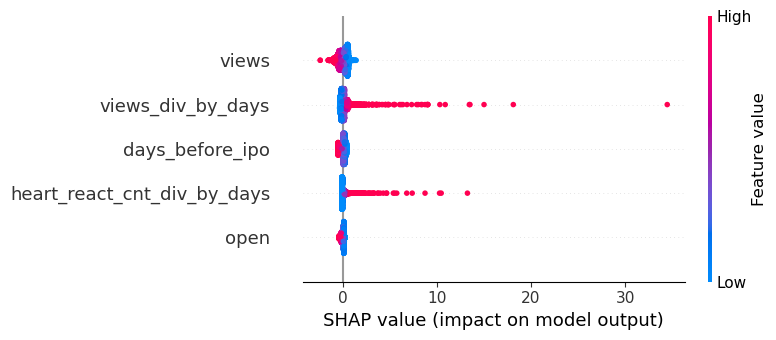

In [31]:
explainer = shap.LinearExplainer(model,
                                 X_test[cols])

shap_values = explainer.shap_values(X_test[cols])

shap.summary_plot(shap_values,
                  X_test[cols],
                  plot_type='dot')

### Обзор вошедших переменных

In [32]:
cols

['views_div_by_days',
 'views',
 'heart_react_cnt_div_by_days',
 'days_before_ipo',
 'open']

#### views_div_by_days

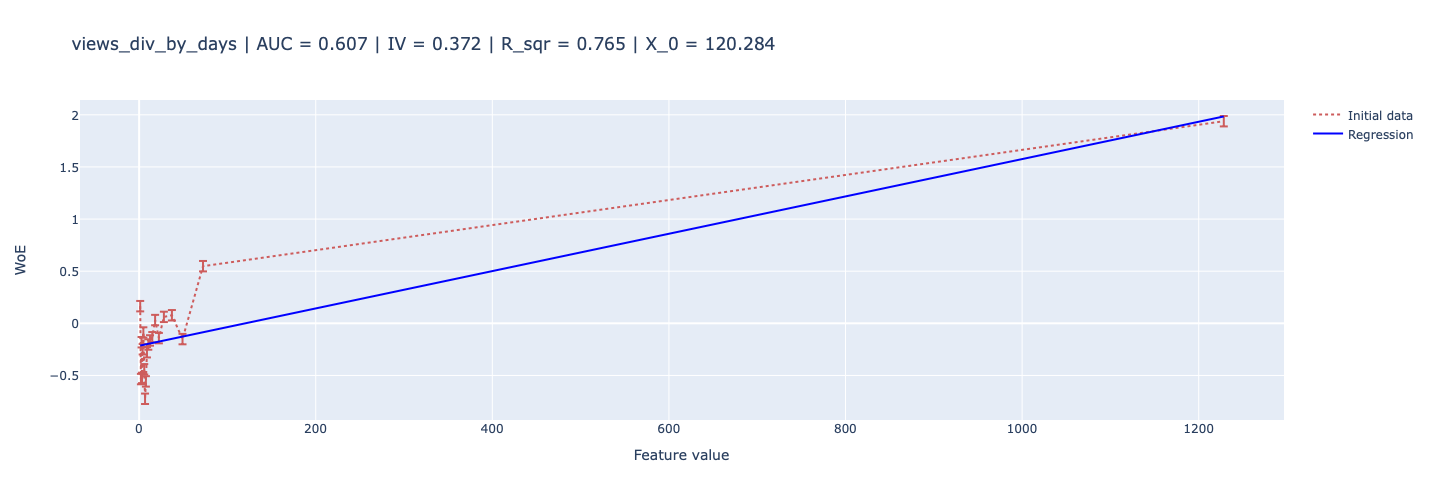

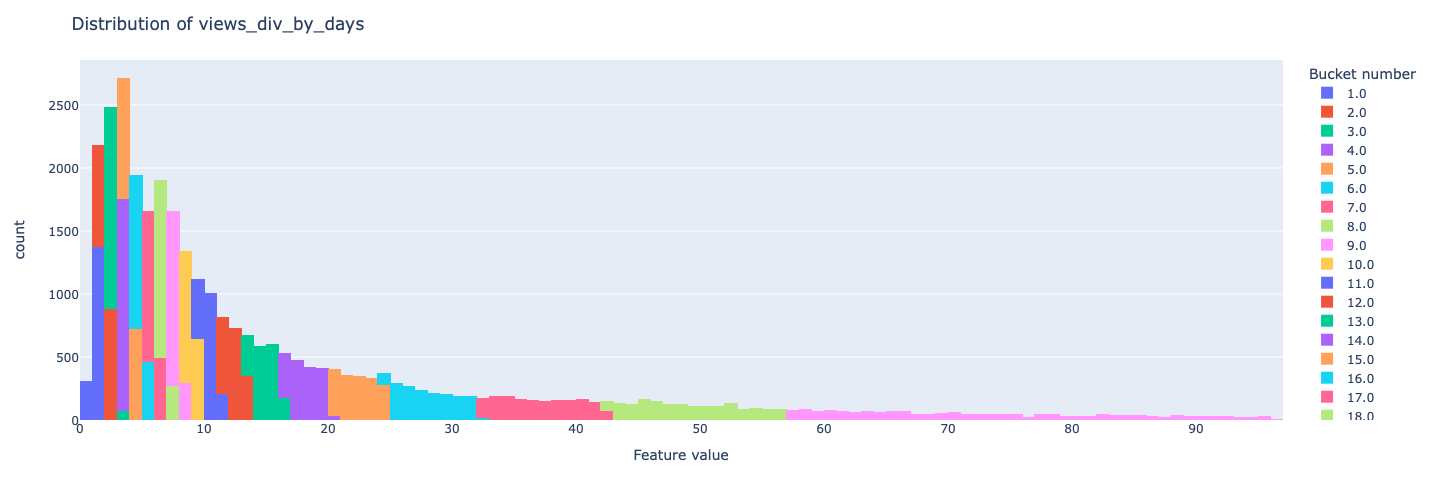

In [39]:
pl.woe_line(X_train['views_div_by_days'], y_train, n_buckets=20, feature_name='views_div_by_days', target_name=target, interactive = False)

#### views

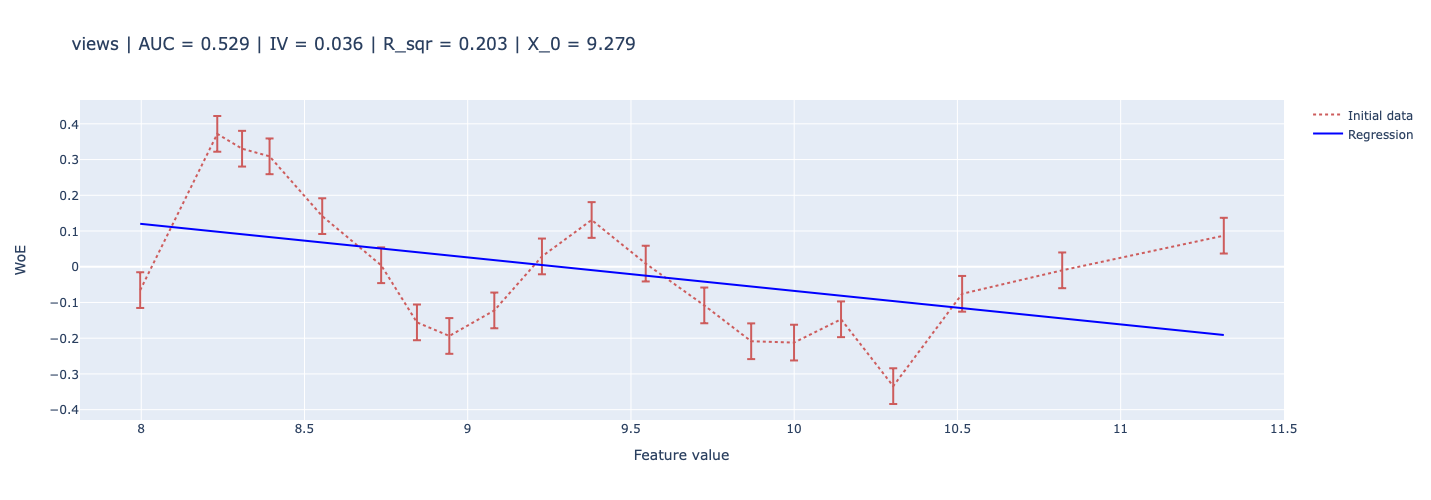

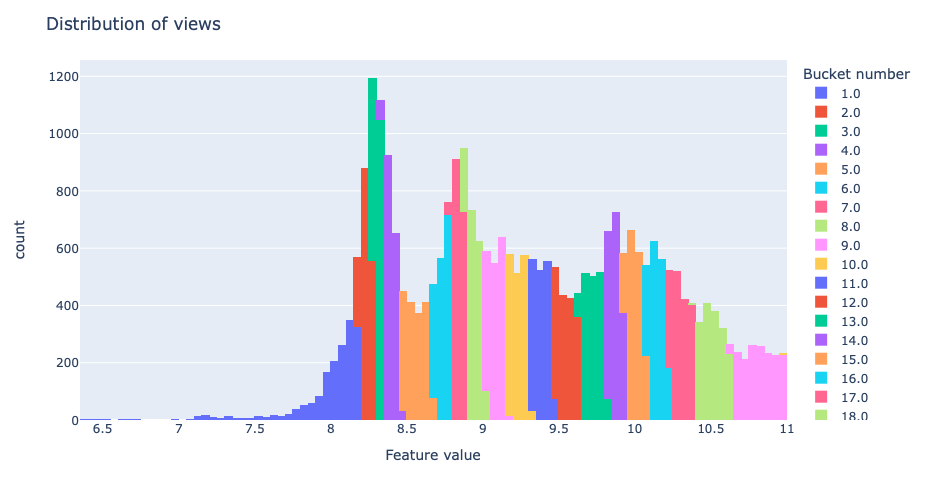

In [39]:
pl.woe_line(X_train['views'], y_train, n_buckets=20, feature_name='views', target_name=target, interactive = False)

#### heart_react_cnt_div_by_days

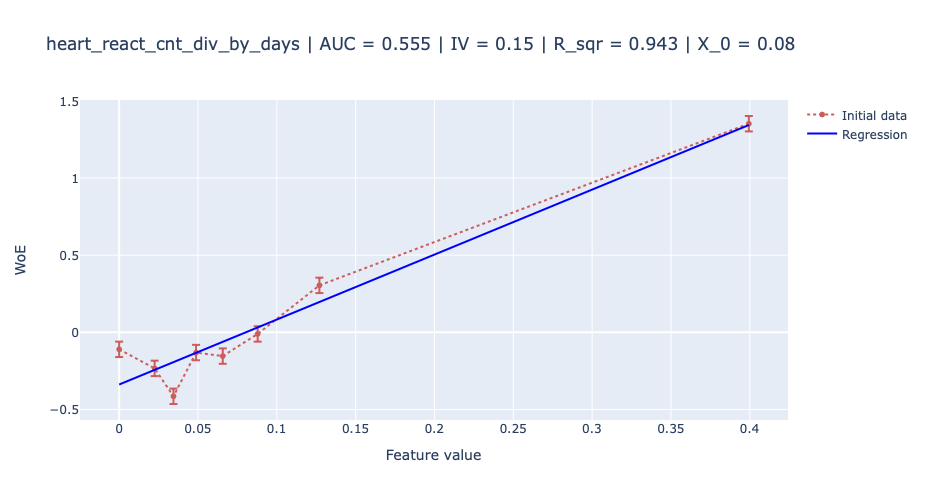

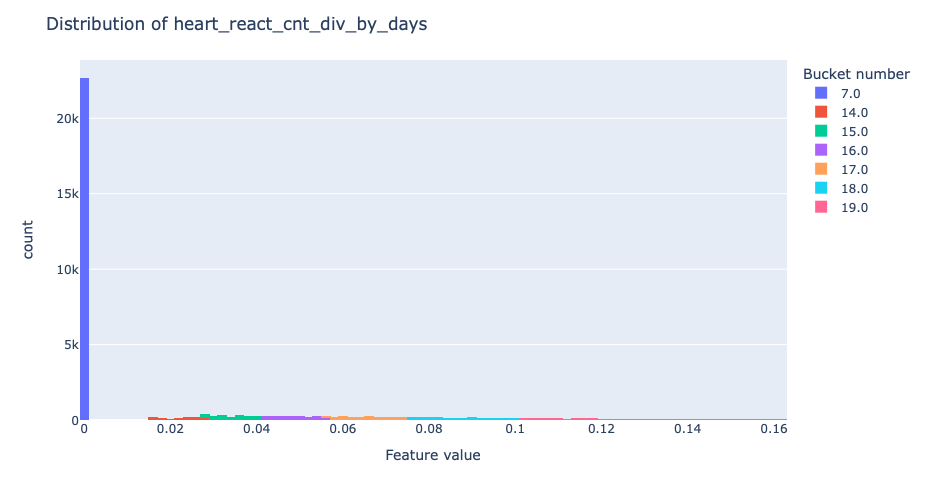

In [40]:
pl.woe_line(X_train['heart_react_cnt_div_by_days'], y_train, n_buckets=20, feature_name='heart_react_cnt_div_by_days', target_name=target, interactive = False)

#### days_before_ipo

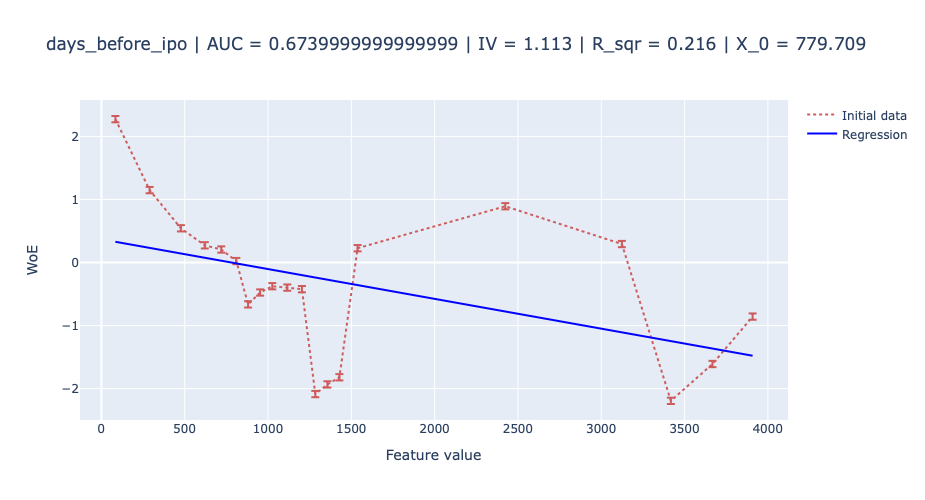

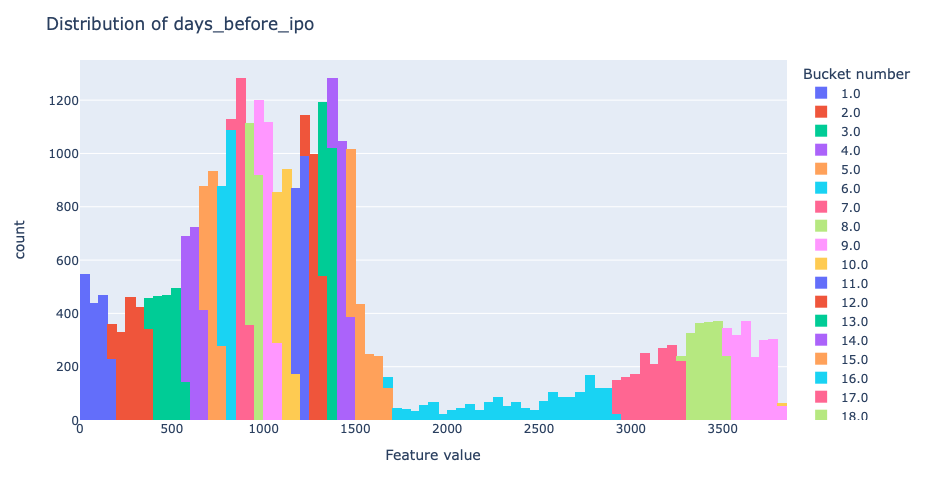

In [41]:
pl.woe_line(X_train['days_before_ipo'], y_train, n_buckets=20, feature_name='days_before_ipo', target_name=target, interactive = False)

#### open

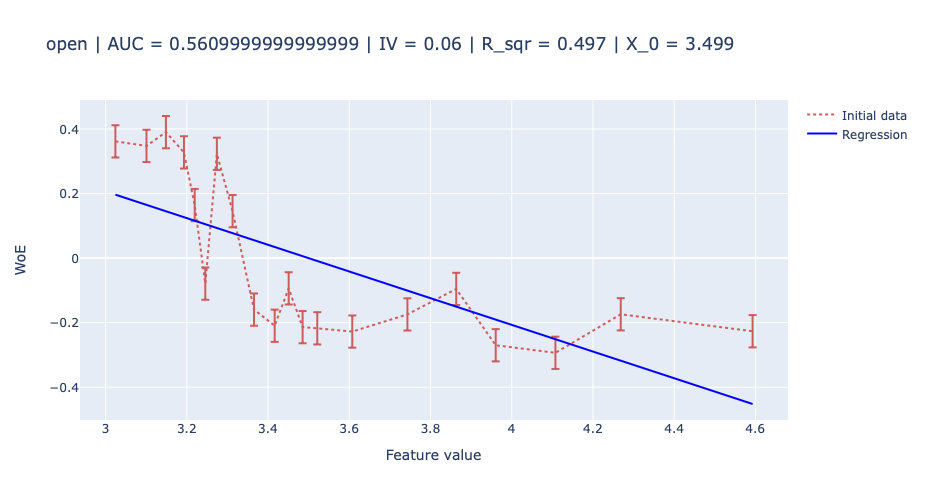

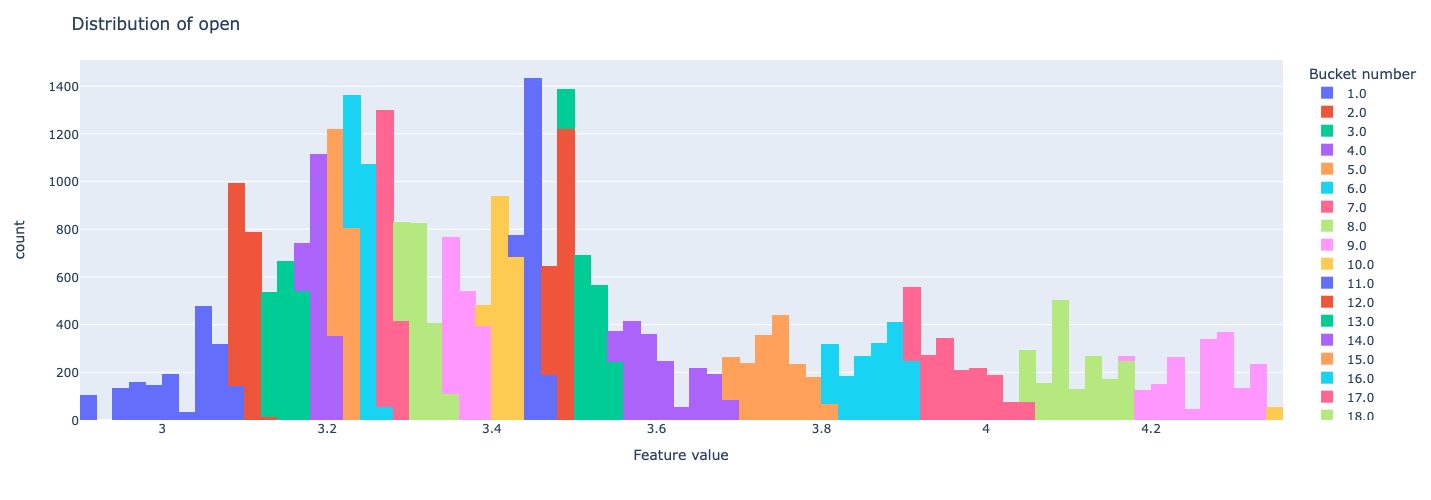

In [42]:
pl.woe_line(X_train['open'], y_train, n_buckets=20, feature_name='open', target_name=target, interactive = False)